In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
from scipy.interpolate import interp1d
plt.rc('font', family='serif', size=15)

/Users/mattwilde/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [282]:
# define constants
pi = np.pi
G = const.G.cgs.value
M_earth = const.M_earth.cgs.value
R_earth = const.R_earth.cgs.value
M_jup = const.M_jup.cgs.value
R_jup = const.R_jup.cgs.value
k_B = const.k_B.cgs.value
m_p = const.m_p.cgs.value
sigma_sb = const.sigma_sb.cgs.value

In [3]:
# read in adiabats

# 1 = density
# 2 = pressure
# 4 = entropy
# 5 = Temperature

infile = 'lowest_entropy_adia.dat'
density, pressure, c1, entropy, temperature, c2, c3 = np.loadtxt(infile,unpack=True)

In [5]:
#EOS from Seager et. al 2007 converted to cgs units
S_EOS = {'Fe': [8.3, 0.00000103472, 0.528], 
        'MgSiO3': [4.1, 4.63261145e-7, 0.541],
        'MgFeSiO3': [4.26, 3.58759757e-7, 0.549], 
        'H2O': [1.460, 9.54465838e-7, 0.513],
        'Cgraphite': [2.250, 0.00000107168, 0.514],
        'SiC': [3.220, 4.99491897e-7, 0.537]}

In [67]:
def init_mass(Mass, num):
    m = np.linspace(1e-5*Mass, Mass, num)
    return m

def init_pressure(Mass):
    # p = np.ones_like(Mass)*1e7
    p = np.zeros_like(Mass)
    return p
    
def init_rho(Mass, EOS, composition):
    # get rhos from Seager Table 3
    # sets up a numpy array with all values set to rho0 for a solid core
    rho0 = EOS[composition][0]
    rho_start = np.ones_like(Mass)*rho0
    return rho_start

def init_r(Mass):
    rs = np.zeros_like(Mass)
    rs[0] = 6000
    return rs
    
def calc_r(Mass, rhos, rr):
    for i in range(0, len(Mass)-1):
        dr3 = (3 / (2*pi)) * (Mass[i+1] - Mass[i]) / (rhos[i+1] + rhos[i])
        rr[i+1] = (dr3 + rr[i]**3)**(1./3.)
    return rr

def calc_P(Mass, rs, p): 
    # go backwards!!!!!!
    for i in range(1, (len(Mass)))[::-1]:
        p[i-1] = (-G*(Mass[i] + Mass[i-1]) * (Mass[i-1] - Mass[i])) / (8.*pi*((rs[i] + rs[i-1])/2.)**4) + p[i]
    return p


      


In [68]:
def calc_rho2(p, rhos, EOS, composition, frac, Mass, p_adiabat, rho_adiabat):
    # frac = % (percent) atmo
    rho0 = EOS[composition][0] # rho[mks] / 1000 to convert to cgs
    c = EOS[composition][1] # 1 dyn·cm−2 or 0.1 Pa
    n = EOS[composition][2]
    for i in range(0,len(Mass)):
        if i < int(len(Mass) - frac*len(Mass)):
            rhos[i] = rho0 + c*p[i]**n
        else: 
            rhos[i] = np.interp(p[i], p_adiabat, rho_adiabat)
    return rhos

In [143]:
def calc_rho3(p, rhos, EOS, rock, frac_rock, frac_atmo, Mass, p_adiabat, rho_adiabat):
    # frac = % (percent) atmo
    if len(rock) != 1:
        # rock type1
        rho0 = EOS[rock[0]][0] # rho[mks] / 1000 to convert to cgs
        c = EOS[rock[0]][1] # 1 dyn·cm−2 or 0.1 Pa
        n = EOS[rock[0]][2]

        #rock type 2
        rho02 = EOS[rock[1]][0] # rho[mks] / 1000 to convert to cgs
        c2 = EOS[rock[1]][1] # 1 dyn·cm−2 or 0.1 Pa
        n2 = EOS[rock[1]][2]
        for i in range(0,int(frac_atmo*len(Mass)*frac_rock)):
            rhos[i] = rho0 + c*p[i]**n
        for i in range(int(frac_atmo*len(Mass)*frac_rock), int(len(Mass) - frac_atmo*len(Mass))):
            rhos[i] = rho02 + c2*p[i]**n2
        for i in range(int(len(Mass) - frac_atmo*len(Mass)), len(Mass)):
            rhos[i] = np.interp(p[i], p_adiabat, rho_adiabat)
    elif len(rock) == 1:
        rho0 = EOS[rock][0] # rho[mks] / 1000 to convert to cgs
        c = EOS[rock][1] # 1 dyn·cm−2 or 0.1 Pa
        n = EOS[rock][2]
        for i in range(0,int(frac_atmo*len(Mass))):
            rhos[i] = rho0 + c*p[i]**n
        for i in range(int(len(Mass) - frac_atmo*len(Mass)), len(Mass)):
            rhos[i] = np.interp(p[i], p_adiabat, rho_adiabat)
    return rhos


In [151]:
def calc_rho4(p, rhos, EOS, rock, frac_rock, frac_atmo, Mass, p_adiabat, rho_adiabat):

    if len(rock) 
    # frac = % (percent) atmo
    # rock type1
    rho0 = EOS[rock[0]][0] # rho[mks] / 1000 to convert to cgs
    c = EOS[rock[0]][1] # 1 dyn·cm−2 or 0.1 Pa
    n = EOS[rock[0]][2]

    #rock type 2
    rho02 = EOS[rock[1]][0] # rho[mks] / 1000 to convert to cgs
    c2 = EOS[rock[1]][1] # 1 dyn·cm−2 or 0.1 Pa
    n2 = EOS[rock[1]][2]
    for i in range(0,int(frac_atmo*len(Mass)*frac_rock)):
        rhos[i] = rho0 + c*p[i]**n
    for i in range(int(frac_atmo*len(Mass)*frac_rock), int(len(Mass) - frac_atmo*len(Mass))):
        rhos[i] = rho02 + c2*p[i]**n2
    for i in range(int(len(Mass) - frac_atmo*len(Mass)), len(Mass)):
        rhos[i] = np.interp(p[i], p_adiabat, rho_adiabat)
    return rhos


In [152]:
def build_planet(Mtot, frax, EOS, compositions, core_frac, p_adiabat, rho_adiabat):
    N = 500
    M = init_mass(Mtot, N)
    r = init_r(M)
    rho = init_rho(M, EOS, compositions[0])
    P = init_pressure(M)

    for count in range(50):
        r = calc_r(M, rho, r)
        P = calc_P(M, r, P)
        rho = calc_rho3(P, rho, S_EOS, compositions, core_frac, frax, M, p_adiabat, rho_adiabat)
    return rho,r,M

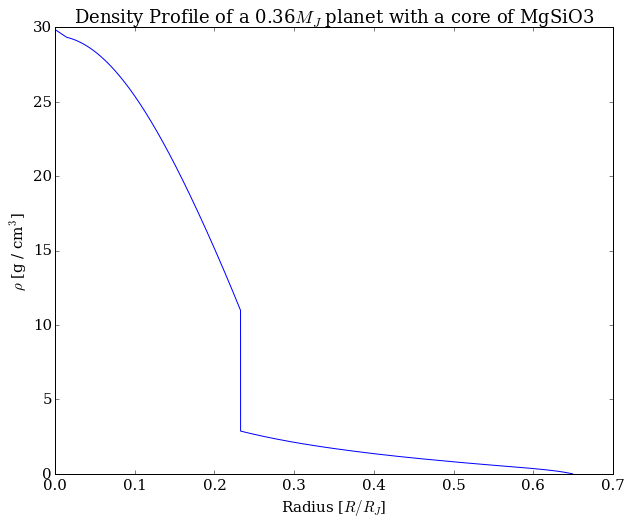

In [70]:
N = 5000
Mtot = 0.36*M_jup
frax = 0.50
compositions = 'MgSiO3'

M = init_mass(Mtot, N)
r = init_r(M)
rho = init_rho(M, S_EOS, compositions)
P = init_pressure(M)

for count in range(10):
    r = calc_r(M, rho, r)
    P = calc_P(M, r, P)
    rho = calc_rho2(P, rho, S_EOS, compositions, frax, M, pressure, density)

plt.figure(figsize=(10,8))
plt.plot(r/R_jup, rho)
plt.title(r'Density Profile of a 0.36$M_{J}$ planet with a core of MgSiO3')
plt.ylabel(r'$\rho$ [g / cm$^{3}$]')
plt.xlabel(r'Radius [$R / R_{J}$]')

In [71]:
print 'Radius of planet =', r[len(r)-1]/R_jup, 'Jupiter radii'

Radius of planet = 0.649368351596 Jupiter radii


## 1a) find the minumum mass of rock to get a 0.65 R_jup planet with total mass = 0.36 M_jup with a cold H/He atmosphere

In [74]:
# find the minimum mass
rock = ['MgSiO3', 'MgFeSiO3', 'SiC', 'Cgraphite']
Mtotal = 0.36*M_jup
f = np.linspace(0.4,0.6,10)
mass_list = []
rock_list = []
frac_list = []
m = M_jup
for comp in rock:
    for frac_rock in f:
        Rho,R,Mass = build_planet(Mtotal, frac_rock, S_EOS, comp, pressure, density)
        min_m = Mass[(len(Mass)-int(frac_rock*len(Mass)))-1]
        if  (R.max()/R_jup - 0.65) < 0.01:
            mass_list.append(min_m)
            rock_list.append(comp)
            frac_list.append(frac_rock)


the minimum mass of rock is  55.9464988048 M_earth
[ 5 11]
rock type(s): MgSiO3 MgFeSiO3
fraction of rock: 0.511111111111 0.511111111111


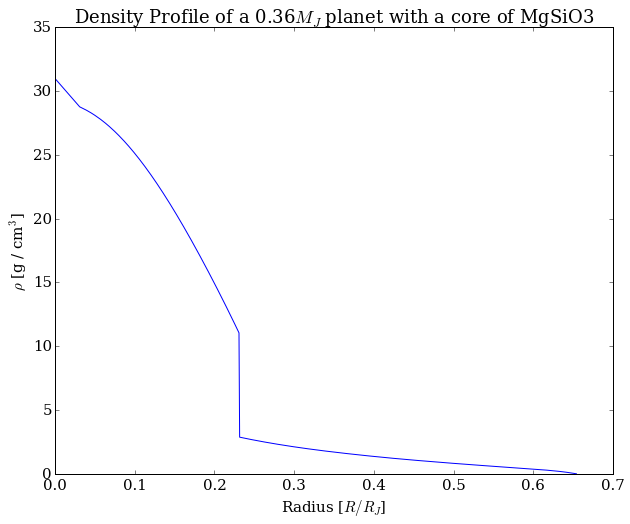

In [81]:
mass_array = np.array(mass_list) 

print "the minimum mass of rock is ",mass_array.min() / M_earth, "M_earth"
# find the indices where this occurs
i_min, = np.where(mass_array == mass_array.min())
print i_min

print "rock type(s):",rock_list[i_min[0]], rock_list[i_min[1]]
print "fraction of atmosphere:", frac_list[i_min[0]], frac_list[i_min[1]]
# plt.plot(mass_array)

Rho,R,Mass = build_planet(Mtotal, frac_list[i_min[0]], S_EOS, rock_list[i_min[0]], pressure, density)

plt.figure(figsize=(10,8))
plt.plot(R/R_jup, Rho)
plt.title(r'Density Profile of a 0.36$M_{J}$ planet with a core of MgSiO3')
plt.ylabel(r'$\rho$ [g / cm$^{3}$]')
plt.xlabel(r'Radius [$R / R_{J}$]')

### Minimum mass in rock is 55.9464988048 M_earth

### 1b) Kepler-11e

In [171]:
Mtotal = 8.4 * M_earth
mass_atmo= Mtotal
# find the minimum mass of the atmosphere
# core = ['Fe', 'MgSiO3', 'MgFeSiO3', 'H2O', 'SiC', 'Cgraphite']
core = ['MgFeSiO3','MgSiO3']
frac_core = 0.5
f = np.linspace(0,1,20)
mass_list = []
rock_list = []
frac_list = []
for comp in core:
    for frac_rock in f:
        Rho,R,Mass = build_planet(Mtotal, frac_rock, S_EOS, core, frac_core, pressure, density)
        if R.max()/R_earth > 4.5:
            # mass of the envelope is just total mass minus core mass
            mass_atmo = Mass.max() - Mass[(len(Mass)-int(frac_rock*len(Mass)))-1]
            if mass_atmo != 0:
                mass_list.append(mass_atmo)
                rock_list.append(comp)
                frac_list.append(frac_rock)

[  1.85042709e+28   2.11190048e+28   2.37337388e+28   2.64490394e+28
   2.90637733e+28   3.16785073e+28   3.43938079e+28   3.70085418e+28
   3.96232757e+28   4.23385764e+28   4.49533103e+28   4.75680442e+28
   1.85042709e+28   2.11190048e+28   2.37337388e+28   2.64490394e+28
   2.90637733e+28   3.16785073e+28   3.43938079e+28   3.70085418e+28
   3.96232757e+28   4.23385764e+28   4.49533103e+28   4.75680442e+28]
the minimum mass of envolope is  3.09736381563 M_earth
[ 0 12]
core type(s): MgFeSiO3
fraction of atmosphere: 0.368421052632
core type(s): MgSiO3
fraction of atmosphere: 0.368421052632


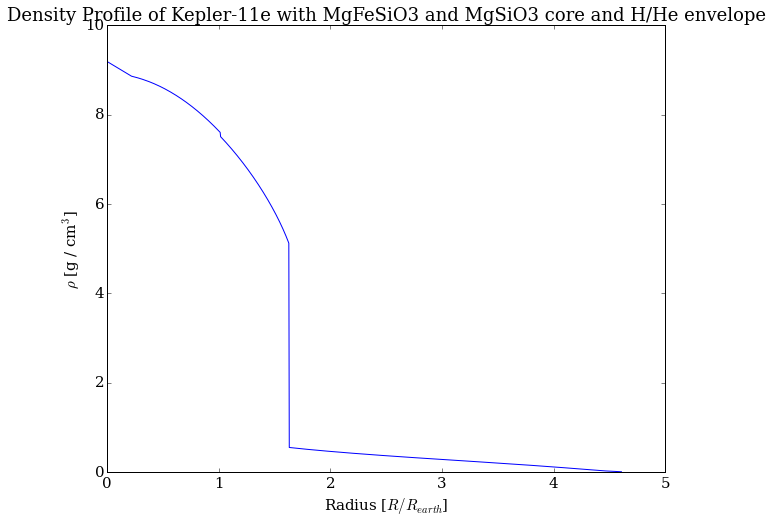

In [175]:
mass_array = np.array(mass_list) 
print mass_array

print "the minimum mass of envolope is ",mass_array.min() / M_earth, "M_earth"
# find the indices where this occurs
i_min, = np.where(mass_array == mass_array.min())
print i_min
for i in i_min:
    print "core type(s):",rock_list[i]
    print "fraction of atmosphere:", frac_list[i]

Rho,R,Mass = build_planet(Mtotal, frac_list[i], S_EOS, core, 0.5, pressure, density)

plt.figure(figsize=(10,8))
plt.plot(R/R_earth, Rho)
plt.title(r'Density Profile of Kepler-11e with MgFeSiO3 and MgSiO3 core and H/He envelope')
plt.ylabel(r'$\rho$ [g / cm$^{3}$]')
plt.xlabel(r'Radius [$R / R_{earth}$]')

### Minimum mass in the envelope is  3.09736381563 M_earth

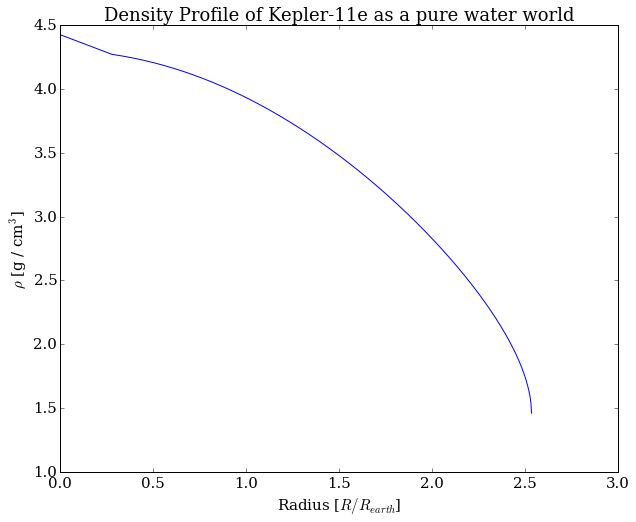

In [179]:
#core = ['MgFeSiO3','SiC']
core = ['H2O', 'H2O']
Mtotal = 8.4 * M_earth
Rho,R,Mass = build_planet(Mtotal, 0, S_EOS, core, 0.5, pressure, density)
plt.figure(figsize=(10,8))
plt.plot(R/R_earth, Rho)
plt.title(r'Density Profile of Kepler-11e as a pure water world')
plt.ylabel(r'$\rho$ [g / cm$^{3}$]')
plt.xlabel(r'Radius [$R / R_{earth}$]')

### As we can see from the density plot, Kepler-11e cannot be a pure water world as the maximum Radius is only ~2.5 R_earth

### 1c) WASP-31

In [228]:
Mtotal = 0.479329 * M_jup
R_planet = 1.537 * R_jup

In [195]:
# read in adiabats

# 1 = density
# 2 = pressure
# 4 = entropy
# 5 = Temperature

infile = 'adia_deep126.dat'
density, pressure, c1, entropy, temperature, c2, c3 = np.loadtxt(infile,unpack=True)

def chunks(l, n):
    n = max(1, n)
    return [l[i:i + n] for i in range(0, len(l), n)]

adia_rho = chunks(density, 516)
adia_p = chunks(pressure, 516)
adia_e = chunks(entropy, 516)
adia_t = chunks(temperature, 516)


#adia_rho = []
#adia_p = []
#adia_e = []
#adia_t = []
#for i in range(126):
#    adia_rho.append(chunks(density, 516)[i])
#    adia_p.append(chunks(pressure, 516)[i])
#    adia_e.append(chunks(entropy, 516)[i])
#    adia_t.append(chunks(temperature, 516))

In [ ]:
Rho,R,Mass = build_planet(Mtotal, frac_rock, S_EOS, core, frac_core, pressure, density)

In [216]:
def calc_rho_adia(p, rhos, Mass, p_adiabat, rho_adiabat):
    for i in range(len(Mass)):
        rhos[i] = np.interp(p[i], p_adiabat, rho_adiabat)
    return rhos

def build_gas_planet(Mtot, EOS, p_adiabat, rho_adiabat, composition):
    N = 500
    M = init_mass(Mtot, N)
    r = init_r(M)
    rho = init_rho(M, EOS, composition)
    P = init_pressure(M)
    

    for count in range(50):
        r = calc_r(M, rho, r)
        P = calc_P(M, r, P)
        rho = calc_rho_adia(P, rho, M, p_adiabat, rho_adiabat)
    return rho, r, M

In [241]:
Mtotal = 0.479329 * M_jup
for i in range(126):
    Rho,R,Mass = build_gas_planet(Mtotal, S_EOS, adia_p[i], adia_rho[i], 'H2O')
    if abs(R.max()/R_jup - 1.537) < 0.05:
        print i


46
47
48


### adiabat 47 best approximates WASP-31b

In [328]:
def E(Mass, rho_adia, T_adia):
    """Function to find thermal content of planet."""
    T = np.zeros_like(Mass)
    dE = np.zeros_like(Mass)
    for i in range(len(Mass)):
        T[i] = np.interp(T[i], rho_adia, T_adia)
    for i in range(1, len(Mass)-1):
        dE = (Mass[i+1]-Mass[i])*k_B*T[i]/m_p
    return dE.sum()
    
def dEdt(Mass, R_p, rho_adia, T_adia):
    T = np.zeros_like(Mass)
    dE = np.zeros_like(Mass)
    for i in range(1, len(Mass)):
        T[i] = np.interp(T[i], rho_adia, T_adia)
    dEdt = 4*pi*R_p**2*sigma_sb*T[len(Mass)-1]**4
    return dEdt, T[len(Mass)-1]
    

In [329]:
Mtotal = 0.479329 * M_jup

Rho47, R47, Mass47 = build_gas_planet(Mtotal, S_EOS, adia_p[47], adia_rho[47], 'H2O')
Rho_cold, R_cold, Mass_cold = build_gas_planet(Mtotal, S_EOS, adia_p[125], adia_rho[125], 'H2O')



In [330]:
print "Energy content of WASP-31b:", E(Mass47, adia_rho[47], adia_t[47]), "[erg]"
print "Energy content of coldest H/He adiabat:", E(Mass_cold, adia_rho[125], adia_t[125]), "[erg]"
ratio = E(Mass47, adia_rho[47], adia_t[47]) / E(Mass_cold, adia_rho[125], adia_t[125])
print "Therefore, WASP-31b is :",ratio, "E_coldest"

Energy content of WASP-31b: 2.33015860166e+38 [erg]
Energy content of coldest H/He adiabat: 1.89522978655e+37 [erg]
Therefore, WASP-31b is : 12.2948605926 E_coldest


In [331]:
E_jup = (Mass47*k_B*100/m_p).sum()
print E_jup

1.8781050482e+42


In [340]:
R_planet = 1.537 * R_jup
dE,T_surface = dEdt(Mass47, R_planet, adia_rho[47], adia_t[47])
dE_cold, T_s_cold = dEdt(Mass_cold, R_jup, adia_rho[125], adia_t[125])
print dE, T_surface
print dE_cold, T_s_cold

4.93791363354e+29 1547.8
9.14747685972e+24 125.89


In [341]:
delta_T = T_surface - 100
E_hot = E(Mass47, adia_rho[47], adia_t[47])
E_cold = E(Mass_cold, adia_rho[125], adia_t[125])
delta_E = E_hot - E_cold
delta_P = dE - dE_cold

dt = delta_E / delta_P

In [343]:
dt_hot = E_hot / dE
dt_cold = E_cold / dE_cold 
print dt_hot / 3.14e7
print dt_cold / 3.14e7

15.0283861103
65982.8250347


### So we find that even a cold (T ~ 100K) planet only takes $66 \times 10^{4}$ years to lose its energy. The hot puffy jupiters would lose their energy much faster and thus we would not expect to find them around old stars unless they are significantly heated.